# Predicting Customer Churn for SyriaTel

## Overview
Customer churn is a huge challenge in the telecommunication industry today. This project aims to develop a machine-learning model that predicts which customers are likely to churn. By identifying them early, SyriaTel can take proactive measures that can improve customer retention and reduce revenue loss.

## 1. Business Understanding
SyriaTel is a telecommunication company that is highly affected by customer churn and this is leading to revenue loss. The company needs an early warning system to identify which customers might be leaving soon so they can take necessary actions to retain them.

*Objectives*
- Predict churn.
- Analyze key factors leading to churn.
- Recommendations on how they can reduce customer churn leading to increase in revenue.

## 2. Data Understanding
This dataset was sourced from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download). This dataset is going to help us build the model. The key features include:

*Customer information* - State, Acc. length, Area code and Phone number

*Service plan* - International plan and voice mail plan.

*Usage data* - Total minutes, calls and charge (day, evening, night)

*Customer support interaction* - Customer service calls

*Target variable* - Churn(1 = left, 0 = Stayed)

## 3.Data Preparation
### Data cleaning

We will start by inspecting and cleaning our data. This process is crucial because raw data often contain errors, so it will improve our data accuracy. It will also enhance our model performance as it performs better with high-quality data. 
So first, we will import any library we will need, then load our dataset so we can be able to view it. We will check its information summary and also check whether it has any missing or duplicated values.

In [1]:
# import necessary libraries and load to dataset
import pandas as pd
df = pd.read_csv("customer.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
#check for basic info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
#check for any null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
#check for any duplicates
df.duplicated().sum()

0

Great! As we have seen above, our data appears to be clean, it has no missing values and no duplactes. The next thing we are going to do is standardize our data and remove any unnecessary columns so we can be left with the relevant ones.eg.`Phone number` is just an identifier and `state` is non numeric, we can do without them. Some important categories we will be working with are `international plan`, `voice mail plan` and `churn`. Machine learning models work best with numeric data but these columns are not numeric. We will have to convert them to numeric first.

In [5]:
#drop columns that aro not useful and change the useful ones from object to numeric
df_clean = df.drop(columns=['phone number', 'state'])

In [6]:
#convert international plan from object to numeric
df_clean['international plan'] = df_clean['international plan'].map({'yes': 1, 'no': 0})

In [7]:
#convert voice mail plan from object to numeric
df_clean['voice mail plan'] = df_clean['voice mail plan'].map({'yes': 1, 'no': 0})

In [8]:
# Convert churn from boolean to integer (0 = No, 1 = Yes)
df_clean['churn'] = df_clean['churn'].astype(int)

In [9]:
#checkout our new data
df_clean.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Handling Outliers

Now that we have succesefully converted our columns to numeric, we are going to see if we can detect any outliers. We are going to do so by first generating a summary of our statistics which will help us identify possible values that are much higher or lower than expected. We will then visualize this using boxplots.

In [10]:
#Generate key statistic for each numeric column 
df_clean.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


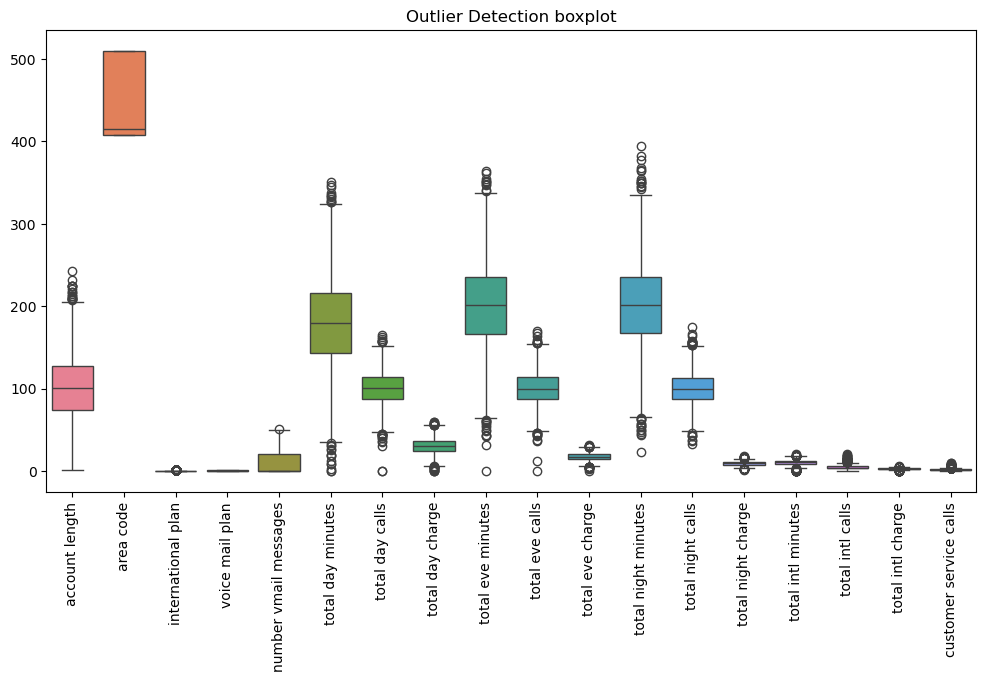

In [11]:
#import all the necessary libraries needed for plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6)) 
sns.boxplot(data=df_clean.drop(columns=["churn"]))
plt.xticks(rotation=90)
plt.title("Outlier Detection boxplot")
plt.show()

From the boxplot above, we can see some ouliers from a couple of the columns like `total day minutes`, `total eve minutes`, `total night minutes` etc. They are represented by the dots that are outside the whiskers. Outliers can affect the model performance and make the predictions less accurate so we will remove them using the Interquartile Range.

In [12]:
#remove outliers using IQR method
#Calculate IQR
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25) #25th percentile
    Q3 = df[columns].quantile(0.75) #75th percentile
    IQR = Q3 - Q1
    #define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #filter the data
    df_filtered = df[~((df[columns]<lower_bound) | (df[columns]> upper_bound)).any(axis=1)]
    return df_filtered

#columns to check for outlires
outlier_columns = ['total day minutes', 'total eve minutes', 'total night minutes']
# Apply outlier removal
df_no_outliers = remove_outliers_iqr(df_clean, outlier_columns)

# Display shape before and after outlier removal
df_clean.shape, df_no_outliers.shape

((3333, 19), (3254, 19))

 From the 3333 rows that we initially had, we are left with 3254. This means that we were able to remover 79 extreme outliers. Now that we have removed the outliers, we can now check the churn distribution for any class imbalance. We can do so by visualizing `churn` in a bar graph to see how many people left and how many people stayed. 

C:\Users\USER\AppData\Local\Temp\ipykernel_2536\3281762900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers['churn'], palette=['green', 'pink'])


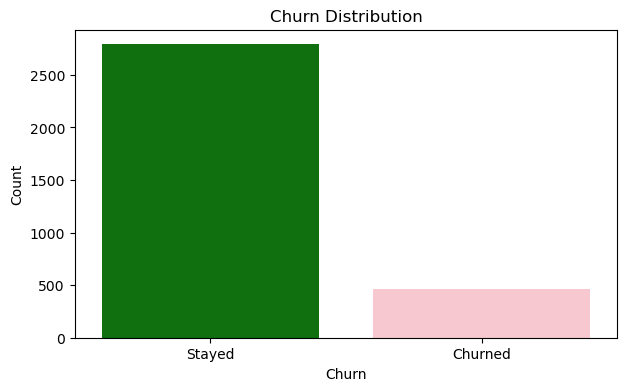

In [13]:
#check churn distribution
plt.figure(figsize=(7, 4))
sns.countplot(x=df_no_outliers['churn'], palette=['green', 'pink'])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.xticks([0,1], ["Stayed","Churned"])
plt.show()

In [14]:
# Display churn percentage
churn_percentage = df_no_outliers['churn'].value_counts(normalize=True) * 100
churn_percentage

churn
0    85.740627
1    14.259373
Name: proportion, dtype: float64

## Handling class imbalance

From the bar graph, there is a clear class imbalance. About 85.7% of customers stayed while 14.3% left. Because we do not want to get biased predictions, we are going to have to balance our classes. For this case we are going to use manual oversampling just to prevent loosing any important data by undersampling. We are going to do this by duplicating the churned customers until both classes are balanced.

In [15]:
#Separate churned and the ones who stayed
df_churned = df_no_outliers[df_no_outliers['churn'] == 1]
df_stayed = df_no_outliers[df_no_outliers['churn'] == 0]

#oversample churned customers by duplicating them
df_churn_oversample = df_churned.sample(len(df_stayed), replace=True, random_state=42)

# Combine both groups to create a balanced dataset
df_balanced = pd.concat([df_stayed, df_churn_oversample])

# Shuffle the dataset to mix duplicated samples
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
df_balanced['churn'].value_counts(normalize=True) * 100

churn
0    50.0
1    50.0
Name: proportion, dtype: float64

Yaay! Our dataset is now balanced.(50% stayed and 50% left). The next thing we are going to do is find the most importat churn predictors in our dataset. We are going to do this by plotting a heatmap.

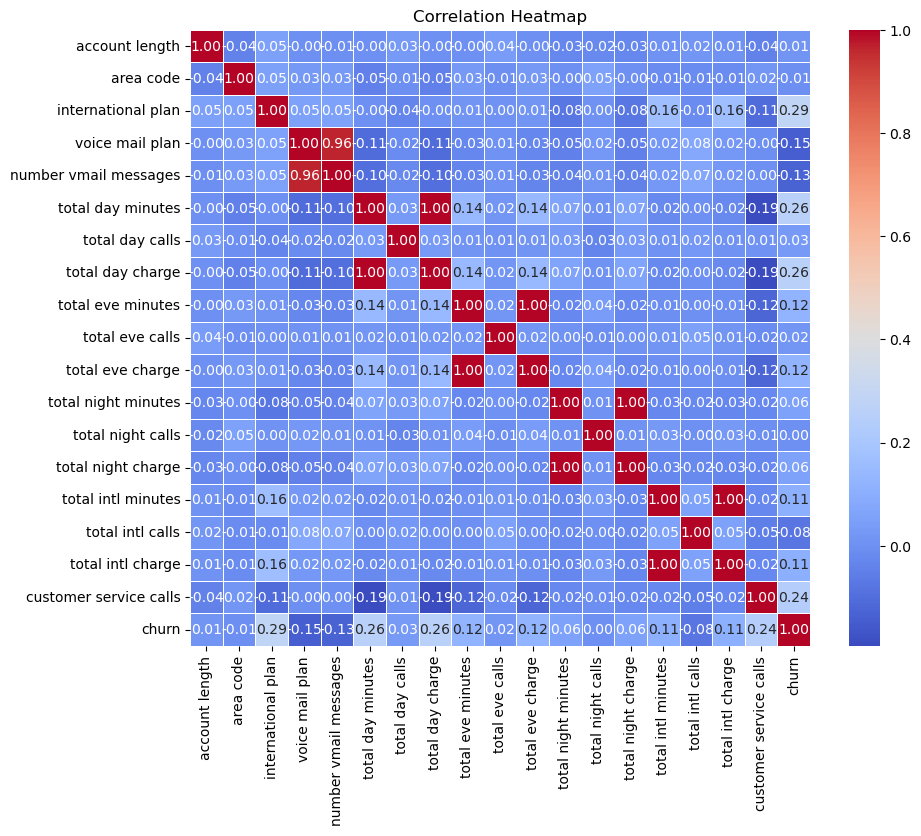

In [16]:
#plot heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_balanced.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the heatmap above, we are able to see that:

1. Customers with international plan churn more.(0.29)
2. High daytime usage correlates with churn.(0.26)
3. Frequent support calls will likely cause someone to churn.(0.24)
4. Customers with voice mail plan are less likely to churn.(-0.13)
5. More international calls slightly reduce churn.(-0.08)

## Feature Engineering

Now that we know exactly what features correlate with churn, we are going to create new variables that are going to help improve our machine learning model and help it make better predictions.

1. Get the sum of all charges.
2. The customer service call ratio.
3. Average call duration.
4. How international plan affects usage.

In [17]:
#average call(day,eve,night,intl)
df_balanced['avg_day_call_duration'] = df_balanced['total day minutes']/(df_balanced['total day calls'] + 1)
df_balanced['avg_eve_call_duration'] = df_balanced['total eve minutes']/(df_balanced['total eve calls'] + 1)
df_balanced['avg_night_call_duration'] = df_balanced['total night minutes']/(df_balanced['total night calls'] + 1)
df_balanced['avg_intl_call_duration'] = df_balanced['total intl minutes']/(df_balanced['total intl calls'] + 1)

#customer servive call ratio
df_balanced['customer_service_call_ratio'] = df_balanced['customer service calls']/(df_balanced['total day calls'] + df_balanced['total eve calls'] + df_balanced['total night calls'] + df_balanced['total intl calls'] + 1)

#total charge sum
df_balanced['total_charge_sum'] = df_balanced['total day charge'] + df_balanced['total eve charge'] + df_balanced['total night charge'] + df_balanced['total intl charge']

#international plan usage
df_balanced['intl_plan_usage'] = df_balanced['international plan'] * df_balanced['total intl minutes']

df_balanced.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total intl charge,customer service calls,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,customer_service_call_ratio,total_charge_sum,intl_plan_usage
0,104,415,0,0,0,109.1,141,18.55,187.1,140,...,2.70,3,0,0.768310,1.326950,2.144554,2.000000,0.007772,46.90,0.0
1,127,408,0,0,0,139.6,94,23.73,240.9,112,...,2.38,2,0,1.469474,2.131858,1.428090,1.760000,0.006689,52.31,0.0
2,102,408,0,0,0,224.7,81,38.20,129.4,112,...,4.27,1,0,2.740244,1.145133,1.523636,2.257143,0.003236,61.01,0.0
3,184,510,1,0,0,213.8,105,36.35,159.6,84,...,1.35,2,0,2.016981,1.877647,1.008696,0.454545,0.005935,57.53,5.0
4,61,510,1,0,0,78.2,103,13.29,195.9,149,...,2.73,2,0,0.751923,1.306000,1.069307,1.442857,0.005571,37.53,10.1


Great! Now that we have the features we need, we are going to standardize the numerical features for better model performance. We are also going to convert our categorical variables(specifically `area code` because we had converted the rest earlier) into a format that the machine will be able to read.

In [18]:
#import library
from sklearn.preprocessing import StandardScaler

#select features for scaling
numerical_features = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes', 'total day calls', 
                      'total eve calls', 'total night calls', 'total intl calls', 'total day charge', 'total eve charge', 'total night charge', 
                      'total intl charge', 'customer service calls', 'avg_day_call_duration', 'avg_eve_call_duration', 'avg_night_call_duration', 
                      'avg_intl_call_duration', 'customer_service_call_ratio', 'total_charge_sum', 'intl_plan_usage']

scaler = StandardScaler()
df_balanced[numerical_features] = scaler.fit_transform(df_balanced[numerical_features])

#convert area code into one hot encoding
df_balanced = pd.get_dummies(df_balanced, columns=['area code'], drop_first=True)

df_balanced.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,customer_service_call_ratio,total_charge_sum,intl_plan_usage,area code_415,area code_510
0,104,0,0,0,-1.364581,1.956602,-1.364340,-0.370220,2.001986,-0.371090,...,0,-1.512041,-1.094982,0.077124,-0.292681,0.321058,-1.261216,-0.440551,True,False
1,127,0,0,0,-0.857326,-0.342333,-0.857572,0.709982,0.584927,0.710788,...,0,-0.622540,0.026972,-0.990372,-0.491679,0.117215,-0.806966,-0.440551,False,False
2,102,0,0,0,0.557998,-0.978209,0.558051,-1.528727,0.584927,-1.528558,...,0,0.989568,-1.348416,-0.848013,-0.079470,-0.532622,-0.076473,-0.440551,False,False
3,184,1,0,0,0.376717,0.195715,0.377063,-0.922368,-0.832132,-0.921478,...,0,0.072032,-0.327371,-1.615248,-1.574104,-0.024742,-0.368670,0.676146,False,True
4,61,1,0,0,-1.878488,0.097888,-1.878934,-0.193533,2.457469,-0.193926,...,0,-1.532829,-1.124185,-1.524940,-0.754640,-0.093191,-2.047966,1.815177,False,True


In [19]:
#convert area code from boolean to integers
df_balanced['area code_415'] = df_balanced['area code_415'].astype(int)
df_balanced['area code_510'] = df_balanced['area code_510'].astype(int)
df_balanced.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,churn,avg_day_call_duration,avg_eve_call_duration,avg_night_call_duration,avg_intl_call_duration,customer_service_call_ratio,total_charge_sum,intl_plan_usage,area code_415,area code_510
0,104,0,0,0,-1.364581,1.956602,-1.364340,-0.370220,2.001986,-0.371090,...,0,-1.512041,-1.094982,0.077124,-0.292681,0.321058,-1.261216,-0.440551,1,0
1,127,0,0,0,-0.857326,-0.342333,-0.857572,0.709982,0.584927,0.710788,...,0,-0.622540,0.026972,-0.990372,-0.491679,0.117215,-0.806966,-0.440551,0,0
2,102,0,0,0,0.557998,-0.978209,0.558051,-1.528727,0.584927,-1.528558,...,0,0.989568,-1.348416,-0.848013,-0.079470,-0.532622,-0.076473,-0.440551,0,0
3,184,1,0,0,0.376717,0.195715,0.377063,-0.922368,-0.832132,-0.921478,...,0,0.072032,-0.327371,-1.615248,-1.574104,-0.024742,-0.368670,0.676146,0,1
4,61,1,0,0,-1.878488,0.097888,-1.878934,-0.193533,2.457469,-0.193926,...,0,-1.532829,-1.124185,-1.524940,-0.754640,-0.093191,-2.047966,1.815177,0,1


Now that our features are all standardized, we can now train our models!

## 1. Logistic Regression
 We will start by splitting our data into training(80%) and testing(20%) then train a simple logistic regression model, make predictions and see how it will perform.
 

In [20]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define X and y
X = df_balanced.drop(columns=['churn'])
y = df_balanced['churn']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

#make predictions
y_pred = log_reg.predict(X_test)

We have sucessfully trained our model.Lets see how our model performed.

In [21]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix

(0.7813620071684588,
 '              precision    recall  f1-score   support\n\n           0       0.77      0.80      0.79       558\n           1       0.79      0.76      0.78       558\n\n    accuracy                           0.78      1116\n   macro avg       0.78      0.78      0.78      1116\nweighted avg       0.78      0.78      0.78      1116\n',
 array([[447, 111],
        [133, 425]], dtype=int64))

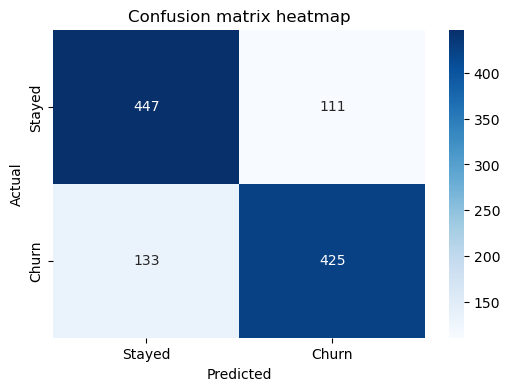

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
           xticklabels=['Stayed', 'Churn'], yticklabels=['Stayed', 'Churn'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix heatmap")
plt.show()

### Findings from our logistic regression model.

1. The model was about 78.14% accurate.
2. Precision and recall was balanced across all customers.(78%)
3. The customers who stayed and were correctly classified were 447(True Negatives)
4. The customers who left and were correctly classified were 425(True Positives)
5. The customers who stayed and were wrongly classified as churned were 111(False Positives)
6. The customers who left and were wrongly classified as stayed were 133(False Negatives)

### 2. Random Forest
We are now going to train a random forest model, just to see how it compares to our logistic regression model.

In [23]:
#import necessary library
from sklearn.ensemble import RandomForestClassifier

#Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#make predictions
y_pred_rf = rf_model.predict(X_test)

#check model performnce
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf, classification_rep_rf, conf_matrix_rf

(0.9991039426523297,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       558\n           1       1.00      1.00      1.00       558\n\n    accuracy                           1.00      1116\n   macro avg       1.00      1.00      1.00      1116\nweighted avg       1.00      1.00      1.00      1116\n',
 array([[557,   1],
        [  0, 558]], dtype=int64))

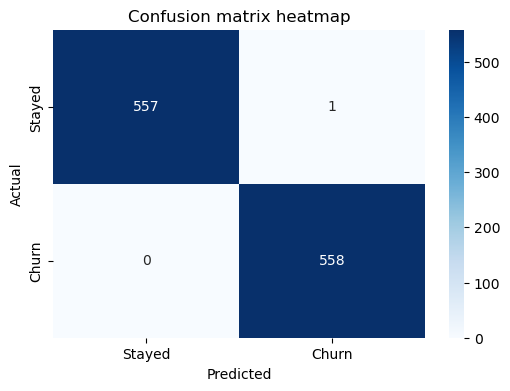

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
           xticklabels=['Stayed', 'Churn'], yticklabels=['Stayed', 'Churn'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix heatmap")
plt.show()

### Findings from our Random Forest Model

1. The model was 99.91% accurate. This is literally almost perfect!
2. Both precision and recall were all at 100% for all customers.
3. There were no false negatives meaning all the customers who left were correctly classified!
4. There was only one False positive meaning only 1 person who stayed was wrongly classified.
5. 557 customers who stayed were correctly classified and 558 customers who left were correctly classified!


## Conclusion
#### Insights
1. Customers with high international usage churn more.
2. Customers with high charges churn more.
3. Customers who call customer support often tend to leave.

### Recommendations
1. Offer better international plans - Adjust pricing or give the customers better interational packages.
2. Address high call chargers - Since charges seem to be too high, you can review them or introduce loyalty discount for existing customers.
3. Improve customer service - Focus on resolving the customers issues and make sure they were able to get a solution to their problems.

# Summary
After cleaning and balancing the dataset, we were able to train Logistic Regression and Random Forest models. The radom forest was more powerful and was 99.91% accurate. We were able to identify key churn drivers and come up with recommendations that will help SyriaTel retain their customers, reducing churn and increasing revenue.